In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

In [15]:
data = pd.read_csv('tips.csv')
data.head()

,total_bill,tip,gender,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3.560330e+15,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4.478070e+15,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6.011810e+15,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4.676140e+15,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4.832730e+15,Sun2251


In [16]:
# extract the total_bill column into a series
total_bill_series = data['total_bill']
print(total_bill_series.head())


0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64


In [17]:
# calculate mean and standard deviation
mu ,std = total_bill_series.mean(), total_bill_series.std()

In [18]:
# Calculate z-score for each value
z_scores = (total_bill_series - mu)/ std

In [19]:
# Plot the normal distribution graph of total_bill
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

(array([0.00171695, 0.0103017 , 0.02232036, 0.04979156, 0.05322546,
        0.06352717, 0.04807461, 0.03948986, 0.03090511, 0.02232036,
        0.0171695 , 0.01545255, 0.00858475, 0.01201865, 0.00515085,
        0.0068678 , 0.00171695, 0.0034339 , 0.00515085, 0.00171695]),
 array([ 3.07 ,  5.457,  7.844, 10.231, 12.618, 15.005, 17.392, 19.779,
        22.166, 24.553, 26.94 , 29.327, 31.714, 34.101, 36.488, 38.875,
        41.262, 43.649, 46.036, 48.423, 50.81 ]),
 <BarContainer object of 20 artists>)

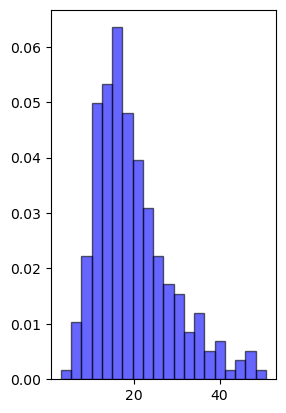

In [20]:
# histogram
plt.subplot(1,2,1)
plt.hist(total_bill_series,bins=20,density=True,alpha=0.6,color='b',edgecolor='black')

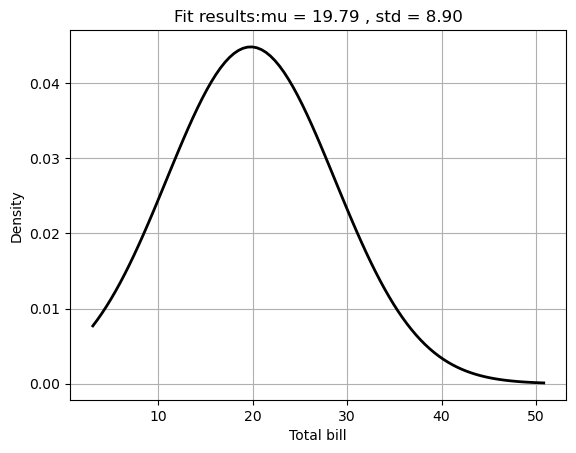

In [21]:
# fit a normal distribution to the data
x = np.linspace(total_bill_series.min(),total_bill_series.max(),100)
p = stats.norm.pdf(x,mu,std)
plt.plot(x,p,'k',linewidth=2)
title = "Fit results:mu = %.2f , std = %.2f" % (mu,std)
plt.title(title)
plt.xlabel('Total bill')
plt.ylabel('Density')
plt.grid(True)

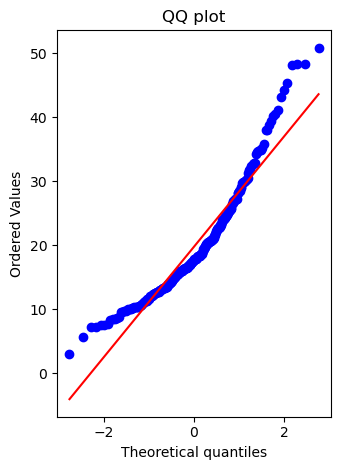

In [22]:
# QQ plot
plt.subplot(1,2,2)
stats.probplot(total_bill_series,dist="norm",plot=plt)
plt.title('QQ plot')
plt.tight_layout()
plt.show()

(array([0.00171695, 0.0103017 , 0.02232036, 0.04979156, 0.05322546,
        0.06352717, 0.04807461, 0.03948986, 0.03090511, 0.02232036,
        0.0171695 , 0.01545255, 0.00858475, 0.01201865, 0.00515085,
        0.0068678 , 0.00171695, 0.0034339 , 0.00515085, 0.00171695]),
 array([ 3.07 ,  5.457,  7.844, 10.231, 12.618, 15.005, 17.392, 19.779,
        22.166, 24.553, 26.94 , 29.327, 31.714, 34.101, 36.488, 38.875,
        41.262, 43.649, 46.036, 48.423, 50.81 ]),
 <BarContainer object of 20 artists>)

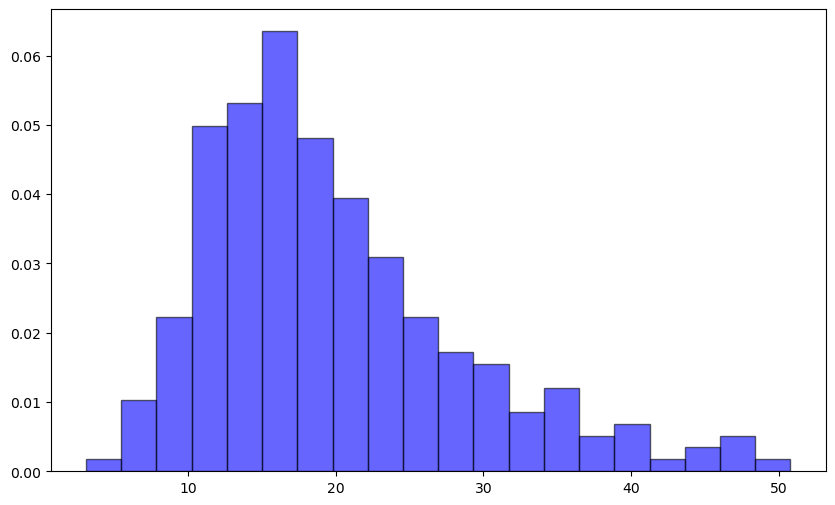

In [23]:
# plot graph showing mean +-SD
plt.figure(figsize=(10,6))
plt.hist(total_bill_series,bins=20,density=True,alpha=0.6,color='b',edgecolor='black')

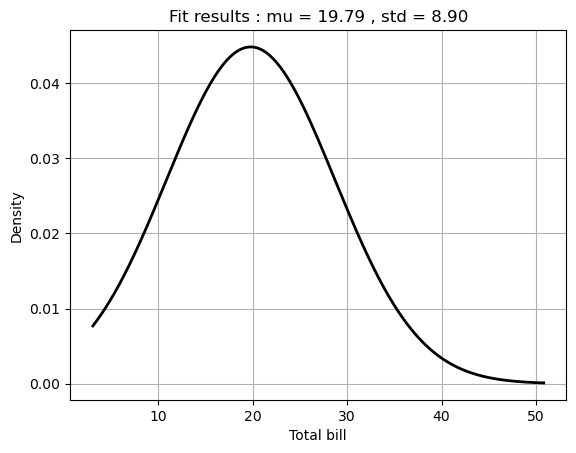

In [27]:
# fit a normal distribution to the data
x = np.linspace(total_bill_series.min(),total_bill_series.max(),1000)
p = stats.norm.pdf(x,mu,std)
plt.plot(x,p,'k',linewidth=2)
title = "Fit results : mu = %.2f , std = %.2f" %(mu,std)
plt.title(title)
plt.xlabel('Total bill')
plt.ylabel('Density')
plt.grid(True)


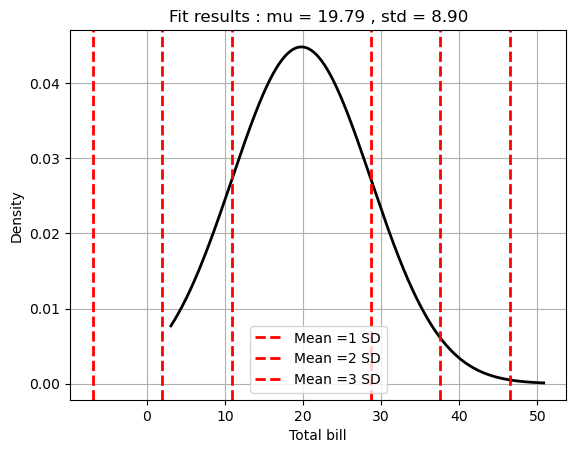

In [26]:
# fit a normal distribution to the data
x = np.linspace(total_bill_series.min(),total_bill_series.max(),1000)
p = stats.norm.pdf(x,mu,std)
plt.plot(x,p,'k',linewidth=2)
title = "Fit results : mu = %.2f , std = %.2f" %(mu,std)
plt.title(title)
plt.xlabel('Total bill')
plt.ylabel('Density')
plt.grid(True)

# Plot mean +-3 SD
for i in range(1,4):
    plt.axvline(mu-i*std ,color='r', linestyle='--', linewidth = 2, label = f'Mean ={i} SD')
    plt.axvline(mu+i*std , color='r', linestyle='--',linewidth = 2)
plt.legend()
plt.show()

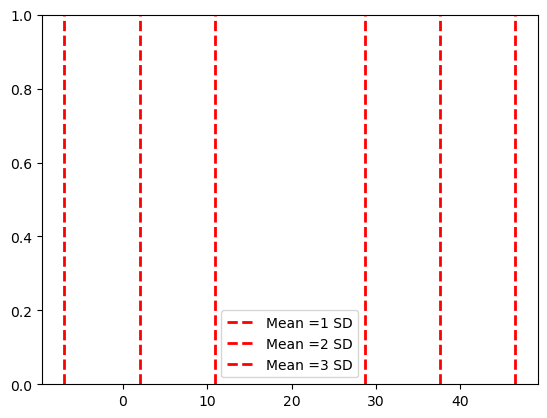

In [25]:
# Plot mean +-3 SD
for i in range(1,4):
    plt.axvline(mu-i*std ,color='r', linestyle='--', linewidth = 2, label = f'Mean ={i} SD')
    plt.axvline(mu+i*std , color='r', linestyle='--',linewidth = 2)
plt.legend()
plt.show()

In [31]:
# Check if mean +- 1SD, mean +- 2SD, and mean +-3SD satisfy the empirical value
within_1sd = (z_scores <= 1) & (z_scores >= -1)
within_2sd = (z_scores <= 2) & (z_scores >= -2)
within_3sd = (z_scores <= 3) & (z_scores >= -3)

percentage_within_1sd = np.sum(within_1sd)/ len(total_bill_series)*100
percentage_within_2sd = np.sum(within_2sd)/ len(total_bill_series)*100
percentage_within_3sd = np.sum(within_3sd)/ len(total_bill_series)*100

print(f"Percentage of data within mean +- 1 SD: {percentage_within_1sd:.2f}%")
print(f"Percentage of data within mean +- 2 SD: {percentage_within_2sd:.2f}%")
print(f"Percentage of data within mean +- 3 SD: {percentage_within_3sd:.2f}%")

Percentage of data within mean +- 1 SD: 72.13%
Percentage of data within mean +- 2 SD: 94.26%
Percentage of data within mean +- 3 SD: 98.36%


In [ ]:
result_df = pd.DataFrame({
    'total_bill': total_bill,
    'total_bill_series': total_bill_series,
    'percentage_within_1sd':percentage_within_1sd ,
    'percentage_within_2sd':percentage_within_2sd ,
    'percentage_within_3sd':percentage_within_3sd ,
}

In [ ]:
if os.path.exists("deletethis-2.csv"):
    os.remove("deletethis-2.csv")
result_df.to_csv("deletethis-2.csv")